In [1]:
def gee(protein, ion, maxdistance=20):
    """Gives the distances of oxygen atoms from an ion.

    :Arguments:
        *protein*
            protein Universe
        *ion*
            ion Atom
        *maxdistance*
            maximum distance of interest from the ion
    
    :Returns:
        *df*
            `pandas.DataFrame` containing resids, resnames, and atom names
            for each oxygen in the protein file
    """
    import numpy as np
    import pandas as pd
    u=protein
    oxy=u.select_atoms('protein and name O*')
    d=oxy.positions-ion.position
    distance=(np.sum(d*d, axis=1))**.5
    distances=list(distance)
    oxy_rnames=[atom.resname for atom in oxy]
    oxy_rids=[atom.resid for atom in oxy]
    oxy_names=[atom.name for atom in oxy]
    df=pd.DataFrame({'resid': oxy_rids, 'resname': oxy_rnames, 'atomname': oxy_names, 'distance': distances},
            columns=['resid', 'resname', 'atomname', 'distance'])
    df=df[df['distance'] < maxdistance]
    return df

In [2]:
def ofr(df, maxdistance, binnumber, color, ax=None):
    """Creates a cumulative histogram of distances of oxygen atoms from an ion.
    
    :Arguments:
        *df*
            `pandas.DataFrame` containing resids, resnames, and atom names
            for each oxygen surrounding the ion
        *maxdistance*
            maximum distance of interest from the ion
        *binnumber*
            number of desired bins for cumulative histogram
        *color*
            desired color for cumulative histogram
        *ax*
            axis to plot on
    
    :Prints:
        *cumulative histogram*
            number of oxygens within a radius of the ion
        *distances table*
            atom numbers, resids, resnames, atom names, and distances from the ion
            of each oxygen
            
    :Returns:
        *ax*
            axis used for plotting
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    if ax is None:
        fig = plt.figure(figsize=(4,3))
        ax = fig.add_subplot(1,1,1)
    values, base=np.histogram(df[df['distance'] < maxdistance]['distance'], bins=binnumber)
    cumulative=np.cumsum(values)
    #print df[df['distance'] < maxdistance].sort(columns='distance', inplace=False)
    ax.plot(base[:-1], cumulative)
    return ax

In [3]:
def gofr(protein, ions, maxdistance, binnumber, color):
    """Creates a cumulative histogram of distances of oxygen atoms from an ion.
    
    :Arguments:
        *protein*
            protein Universe
        *ions*
            AtomGroup of ions
        *maxdistance*
            maximum distance of interest from the ion
        *binnumber*
            number of desired bins for cumulative histogram
        *color*
            desired color for cumulative histogram
    
    :Prints:
        *cumulative histogram*
            number of oxygens within a radius of the ion
        *distances table*
            atom numbers, resids, resnames, atom names, and distances from the ion
            of each oxygen
    """
    fig=plt.figure(figsize=(4,3))
    ax=fig.add_subplot(1,1,1)
    for ion in ions:
        ofr(gee(protein, ion), maxdistance, binnumber, color, ax=ax)
    return ax

In [4]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
%matplotlib inline

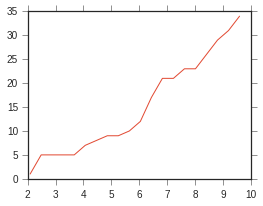

In [5]:
import MDAnalysis as mda
u=mda.Universe('2JLN.pdb')
ions=u.select_atoms('not protein and name NA*')
gofr(u, ions, 10, 20, 'blue')

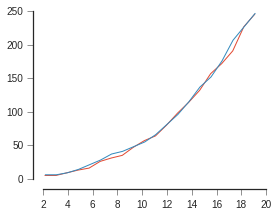

In [6]:
import MDAnalysis as mda
u=mda.Universe('2A65.pdb')
ions=u.select_atoms('not protein and name NA*')
ax=gofr(u, ions, 20, 20, 'purple')
sns.despine(offset=10, ax=ax)

In [8]:
u=mda.Universe('2A65.pdb')
ions=u.select_atoms('not protein and name NA*')
gee(u, ions[0])

,resid,resname,atomname,distance
2,6,GLU,OE1,19.030685
3,6,GLU,OE2,18.740007
4,7,HIS,O,19.034414
5,8,TRP,O,19.413780
7,10,THR,O,16.942127
8,10,THR,OG1,17.365667
9,11,ARG,O,15.854238
10,12,LEU,O,13.485165
11,13,GLY,O,11.985309
12,14,LEU,O,11.601841
